- 📚 데이터 사이언티스트의 실전노트, 이지영, [비제이퍼블릭](https://bjpublic.tistory.com/) 
- 🌟 [YouTube: 통계학 & 데이터과학](https://https://www.youtube.com/channel/UC2BreMMPUd0djRpA4UEaD3Q)
- 💻 [클래스101: 데이터 과학자 실무 프로젝트 (분석+예측모델 + AWS 자동화)](https://class101.page.link/MhG4)

# 1.2.2 진짜 데이터 사이언티스트가 갖춰야 할 역량
## 1.2.2.4 기술력(3) 프로그래밍 능력: 나쁜 프로그래밍 언어는 없어도 나쁜 코딩은 있다. 
파이썬 예제 1. 내가 다루는 데이터 포맷, 가장 적합한 포맷일까? (Page 28)

In [1]:
# 파이썬 확인 
from platform import python_version
print("파이썬:", python_version())

파이썬: 3.9.7


In [2]:
# 판다스 라이브러리 설치
# !pip3 install pandas
# !pip3 install pyarrow

In [3]:
# 데이터 분석 라이브러리
import pandas as pd

# 수치 연산을 수행하는 선형 대수(Linear Algebra) 라이브러리 
import numpy as np

# 난수(Random) 생성
import random

# 시간 계산
from timeit import default_timer as timer

# 그래프 관련 라이브러리  
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

In [4]:
def generate_dataframe(n_rows, n_cols):
    """
    주어진 행과 열의 숫자로 임의의 데이터 프레임을 생성하며,
    이때 각 열의 ㄱ밧은 표준정규분포를 띄는 임의의 수를 가진다.
    """
    # 딕셔너리에서 키(key)는 열 이름, 밸류(value)는 표준정규분포를 띄는 무작위 수로, 차후 데이터프레임으로 변환
    random_dataframe = {}

    for col in range(n_cols):
    # 문자열에서 특정 부분을 바꿀 경우 f-string(문자열 포맷팅) 사용
    # 문자열에서 앞에 f를 붙여 주고, 중괄호 안에 변수 이름이나 출력하고 싶은 것을 입력
        col_name = f'col_{col+1}'
        values = np.random.normal(0, 1, n_rows)
        random_dataframe[col_name] = values
        return pd.DataFrame(random_dataframe)

In [5]:
# 테스트 함수: csv, csv.gzip, pickle, feather
def get_results(n_rows, n_cols): 
    """
    1. 주어진 행과 열의 숫자를 입력하면, 표준정규분포를 가진 임의 데이터프레임 생성
    2. CSV, CSV.gzip, pickle, feather로 데이터를 저장하고 불러오는 시간 계산 후,
    3. 종류별 소요시간을 그래프로 출력 
    """
 
    # generate_dataframe를 이용해 임의 데이터 생성 
    df_sample = generate_dataframe(n_rows, n_cols)
    
    print("생성된 데이터프레임 정보")
    df_sample.info()
    
    # 테스트(포맷) 종류 
    test_list = ["csv", "csv.gzip", "pickle", "feather"]

    # 각 테스트마다 데이터를 저장하는 시간, 불러오는 시간을 리스트에 넣을 예정 
    # start와 end로 파일 저장 시간을 계산 후, test_save_time에 저장
    test_save_time = []
    # start와 end로 파일 읽는 시간을 계산 후, test_read_time에 저장
    test_read_time = []
    
    # 실험1: CSV
    start = timer()
    df_sample.to_csv("./data/sample.csv")
    end = timer()
    test_save_time.append(round(end - start, 3))

    start = timer()
    pd.read_csv("./data/sample.csv")
    end = timer()
    test_read_time.append(round(end - start, 3))

    # 실험2: CSV.gzip
    start = timer()
    df_sample.to_csv("./data/sample_gzip.csv", compression='gzip')
    end = timer()
    test_save_time.append(round(end - start, 3))

    start = timer()
    pd.read_csv("./data/sample_gzip.csv", compression='gzip')
    end = timer()
    test_read_time.append(round(end - start, 3))

    # 실험3: pickle
    start = timer()
    df_sample.to_pickle("./data/sample.pkl")
    end = timer()
    test_save_time.append(round(end - start, 3))

    start = timer()
    pd.read_pickle("./data/sample.pkl")
    end = timer()
    test_read_time.append(round(end - start, 3))

    # 실험4: feather
    start = timer()
    df_sample.to_feather("./data/sample.feather")
    end = timer()
    test_save_time.append(round(end - start, 3))

    start = timer()
    pd.read_feather('./data/sample.feather')  
    end = timer()
    test_read_time.append(round(end - start, 3))
    
    # 결과값을 그래프로 변환 
    # 참고: https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.bar.html
    # 사이즈 참고: https://matplotlib.org/users/dflt_style_changes.html   
    
    # 그래프 폰트 사이즈 설정 
    size = 13
    params = {'figure.figsize': [10, 7], # 그래프 사이즈 설정
            'legend.fontsize': size,
            'font.size':size,
            'figure.titlesize': size*1.3,
            'axes.labelsize': size,
            'xtick.labelsize': size,
            'ytick.labelsize': size}
    plt.rcParams.update(params)
    
    
    # matplotlib 폰트 설정 (Mac OS인 경우)
    rc('font', family='AppleGothic')
    plt.rcParams['axes.unicode_minus'] = False

    x = np.arange(len(test_list)) # 값 위치 
    width = 0.35 # 바 넓이
    fig, ax = plt.subplots()
    
    # 저장 시간과 읽는 시간 - 두 개 막대그래프가 보이도록 설정 
    rects1 = ax.bar(x - width/2, test_save_time, width, label='저장시간')
    rects2 = ax.bar(x + width/2, test_read_time, width, label='읽기시간')
    
    ax.set_title(f'파일 종류별 저장/읽기 시간 \n 데이터프레임 사이즈: {df_sample.shape}')
    ax.set_ylabel('시간 (초)')
    ax.set_xticks(x)
    ax.set_xticklabels(test_list)
    ax.legend()
    
    # 막대 그래프마다 결과값(시간) 표기 
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height}', #저장/읽기시간 값
                        xy=(rect.get_x() + rect.get_width() / 2, height), #값 위치
                        xytext=(0, 4), #결과값과 (x,y)포인트와의 거리  
                        textcoords="offset points",
                        ha='center')
            
    autolabel(rects1)
    autolabel(rects2)
    fig.tight_layout()
    plt.show()
    
    # 그래프 이미지 파일로 저장
    fig.savefig('파일저장읽기시간그래프.png', dpi=200)


생성된 데이터프레임 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   col_1   float64
dtypes: float64(1)
memory usage: 22.9 MB


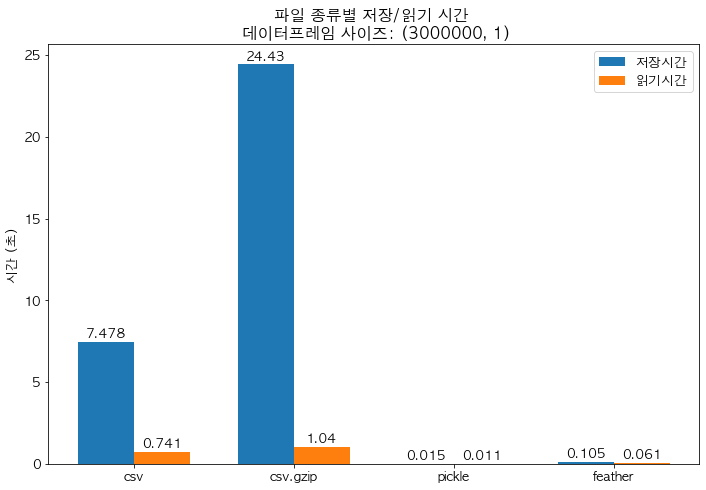

In [6]:
# 함수 실행하기
get_results(3000000, 5)

⚠ 저작권: Copyright 2022. (이지영) all rights reserved. 
본 자료는 저작권법에 의하여 보호받는 저작물로서 이에 대한 무단 복제 및 배포를 원칙적으로 금합니다. 협의 없이 배포하거나 무단으로 사용할 경우 저작권법 제136조, 137조, 138조 위반으로 사전 경고 없이 손해배상 청구 등 민,형사상의 책임과 처벌을 받을 수 있습니다.